# Speech Emotion Recognition - CS4120 Final project 
By Jesse E. and Alina G. 

### Label keys (from kaggle): 
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

In [1]:
# imports 
import os 
from tqdm import tqdm # to help with acknowledging runtimes...
import librosa # maybe need to import scipy (?)
import numpy as np
import utils
import speech_recognition as sr
import pandas as pd
import plotly.express as px

In [2]:
path = './audio_data'
audio_folders = os.listdir(path)

audio_files = {} # save all filenames so we can use for text :))
audio_data = {} # save .wav data loaded in from librosa 

# get all filenames and load in wavs...
for folder in audio_folders: 
    curr_path = path + '/' + folder
    files = os.listdir(curr_path)
    audio_files[folder] = files

    data = utils.load_wavs(curr_path, files)
    audio_data[folder] = data

The above saves the `.wav` files in the following format: `{actor_folder: [((sig,rate), label), ...]}` in the audio_data dictionary. We can use `utils.seperate_tups()` to extract the sig,rate pairing and labels in each key/value pair. 
Below we will attempt to read in the audio and convert it to text. 

In [3]:
audio_text = {} # get audio text

for folder,files in tqdm(audio_files.items()): # takes approx 25 mins 
    curr_path = path + '/' + folder
    texts = utils.get_audio_text(curr_path, files)
    audio_text[folder] = texts

100%|██████████| 25/25 [44:08<00:00, 105.92s/it]


In [4]:
# write the data as a json... 
utils.write_files(audio_data, 'audio_data.json')
# file too big ;w; to push to github, but it takes like 5 secs to run. 

Successfully dumped data into audio_data.json!


NameError: name 'audio_texts' is not defined

In [5]:
utils.write_files(audio_text, 'audio_text.json')

Successfully dumped data into audio_text.json!


In [6]:
all_labels = []
for folder, values in audio_data.items(): 
    sig_rates, labels = utils.seperate_tups(values)
    all_labels += labels

px.histogram(all_labels, title='Distribution of labels in data')

In [12]:
waves = audio_data['Actor_01'][0][0][0]
px.line(waves)

In [1]:
features = ['White', 'Black', '', .....]
X = merged_df[features]
y = merged_df['party_simplified']

evaluate_model(X, y, range(4, 11))


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

105


In [8]:
audio_data.keys()

dict_keys(['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_speech_actors_01-24'])

# Emotion Recognition in Text using neural LLMS

Using [this](https://github.com/dair-ai/emotion_dataset) dataset with sampled tweets + preprocessed emotions as labels. 

__Annotations of different emotions:__
Anger : 0
Fear : 1
Joy : 2
Love : 3
Sadness : 4
Surprise : 5

In [22]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

EMOTION_KEY = {0: 'anger', 1: 'fear', 2: 'joy', 3:'love', 4:'sadness', 5: 'surprise'} # manually done 

In [41]:
df = pd.read_csv('data/training.csv')
df['label_text'] = [EMOTION_KEY[_] for _ in df['label']]
df.head()

text  label label_text
0                            i didnt feel humiliated      0      anger
1  i can go from feeling so hopeless to so damned...      0      anger
2   im grabbing a minute to post i feel greedy wrong      3       love
3  i am ever feeling nostalgic about the fireplac...      2        joy
4                               i am feeling grouchy      3       love

In [42]:
px.histogram(df["label_text"]) # everyone is afraid i guess

### Exploring the data; which words define an emotion? 
lets make word clouds :))) 

In [37]:
def parse(lst:list, stopwords):
    """ parses a list of strings representing tweets """ 
    valid_total = []
    for tweet in lst: 
        tweet = tweet.split()
        valid = [word for word in tweet if word not in stopwords]
        valid_total.append(" ".join(valid))
    return " ".join(valid_total)

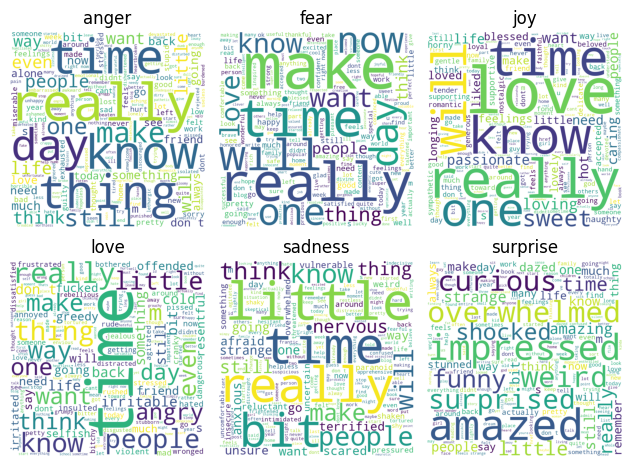

In [39]:
stopwords = set(list(STOPWORDS) + ['feel', 'feeling', 'ive', 'im'])

# generate a word cloud for every... label
for label in EMOTION_KEY.keys(): 
    sub_df = df.loc[df['label'] == label] # gets only values with this specific label 
    text = parse(sub_df['text'].tolist(), stopwords)
    wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
    # plot the WordCloud image  
    plt.subplot(2, 3, label+1)     
    plt.title(EMOTION_KEY[label])                
    # plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 1)
    
plt.show()